# Sales Analysis

#### Import necessary library

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

### Task 0.1: Merge all files into one csv file

In [2]:
path = "./data/"

files = [file for file in os.listdir(path) if file.startswith("Sales") and file.endswith(".csv")] # only choose csv files

grouped = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+file)
    grouped = pd.concat([grouped, current_data])
    
grouped.drop(columns='Unnamed: 0', inplace=True)

grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168283 entries, 0 to 15147
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          168283 non-null  int64  
 1   Product           168283 non-null  object 
 2   Quantity          168283 non-null  int64  
 3   Price Each        168283 non-null  float64
 4   Order Date        168283 non-null  object 
 5   Purchase Address  168283 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.0+ MB


#### Rename and fixed the data type

In [3]:
purchase_id = []

for i in range(1, len(grouped)+1):
    purchase_id.append(i)
    
grouped['ID'] = purchase_id
grouped.rename(columns={"Order ID": "User ID"}, inplace=True)
grouped['Order Date'] = pd.to_datetime(grouped['Order Date'])

cols = grouped.columns.tolist()

cols = cols[-1:] + cols[:-1]
grouped = grouped[cols]

grouped.head()

,ID,User ID,Product,Quantity,Price Each,Order Date,Purchase Address
0,1,34352,34in Ultrawide Monitor,1,379.99,2020-04-28 21:47:00,"4864 Willow St, Dallas, TX 75001"
1,2,34353,AA Batteries (4-pack),1,3.84,2020-04-29 06:33:00,"5103 Jefferson St, Los Angeles, CA 90001"
2,3,34354,Lightning Charging Cable,1,14.95,2020-04-28 16:38:00,"6451 7th St, Portland, OR 97035"
3,4,34355,iPhone,1,700.00,2020-04-29 18:08:00,"3785 Main St, Dallas, TX 75001"
4,5,34355,Wired Headphones,1,11.99,2020-04-29 18:08:00,"3785 Main St, Dallas, TX 75001"


## Q1: What was the best month for sales? How much was earned that month?

### Task 1.1: Add a Sales column

In [4]:
grouped['Sales'] = grouped['Price Each'] * grouped['Quantity']

print(grouped.info())
grouped.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168283 entries, 0 to 15147
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                168283 non-null  int64         
 1   User ID           168283 non-null  int64         
 2   Product           168283 non-null  object        
 3   Quantity          168283 non-null  int64         
 4   Price Each        168283 non-null  float64       
 5   Order Date        168283 non-null  datetime64[ns]
 6   Purchase Address  168283 non-null  object        
 7   Sales             168283 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 11.6+ MB
None


,ID,User ID,Product,Quantity,Price Each,Order Date,Purchase Address,Sales
0,1,34352,34in Ultrawide Monitor,1,379.99,2020-04-28 21:47:00,"4864 Willow St, Dallas, TX 75001",379.99
1,2,34353,AA Batteries (4-pack),1,3.84,2020-04-29 06:33:00,"5103 Jefferson St, Los Angeles, CA 90001",3.84
2,3,34354,Lightning Charging Cable,1,14.95,2020-04-28 16:38:00,"6451 7th St, Portland, OR 97035",14.95
3,4,34355,iPhone,1,700.00,2020-04-29 18:08:00,"3785 Main St, Dallas, TX 75001",700.00
4,5,34355,Wired Headphones,1,11.99,2020-04-29 18:08:00,"3785 Main St, Dallas, TX 75001",11.99


### Task 1.2: Add a Month column

In [5]:
grouped['Month'] = grouped['Order Date'].dt.month
grouped['Month Name'] = grouped['Order Date'].dt.strftime("%b")

grouped.head()

,ID,User ID,Product,Quantity,Price Each,Order Date,Purchase Address,Sales,Month,Month Name
0,1,34352,34in Ultrawide Monitor,1,379.99,2020-04-28 21:47:00,"4864 Willow St, Dallas, TX 75001",379.99,4,Apr
1,2,34353,AA Batteries (4-pack),1,3.84,2020-04-29 06:33:00,"5103 Jefferson St, Los Angeles, CA 90001",3.84,4,Apr
2,3,34354,Lightning Charging Cable,1,14.95,2020-04-28 16:38:00,"6451 7th St, Portland, OR 97035",14.95,4,Apr
3,4,34355,iPhone,1,700.00,2020-04-29 18:08:00,"3785 Main St, Dallas, TX 75001",700.00,4,Apr
4,5,34355,Wired Headphones,1,11.99,2020-04-29 18:08:00,"3785 Main St, Dallas, TX 75001",11.99,4,Apr


### Task 1.3: Calculate and Plot sales by month

#### Create graph plotting function

In [6]:
def graph_plot(df, title, xlabel, ylabel, xdeg=0, kind='bar'):
    set_kind = kind
    
    plt.figure()
    plt.title(str(title) + " Graph")
    df.plot(kind=kind)
    
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    if set_kind == 'line':
        plt.grid()
    
    plt.show()
    plt.gca()
    plt.cla()
    plt.gcf()
    plt.clf()
    plt.close()

Month Name
Jan    2.101235e+06
Feb    2.662547e+06
Mar    2.468099e+06
Jun    1.991444e+06
May    2.574731e+06
Apr    3.513197e+06
Aug    2.145011e+06
Oct    1.878424e+06
Jul    2.953269e+06
Sep    3.095023e+06
Nov    4.010099e+06
Dec    5.264387e+06
Name: Sales, dtype: float64


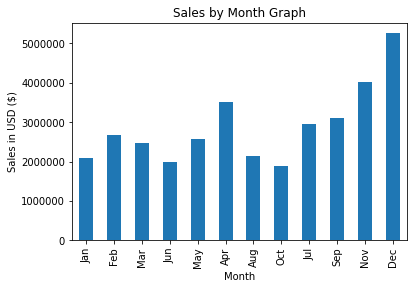

In [7]:
sales_by_month = grouped.groupby('Month Name').sum().sort_values('Month', ascending=True)['Sales']
    
print(sales_by_month)

graph_plot(sales_by_month, "Sales by Month", "Month", "Sales in USD ($)", xdeg=0)

## Q2: Which city had the highest sales?

### Task 2.1: Breakdown Address column

In [8]:
def get_street(address):
    return address.split(",")[0]

def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[-1].split(" ")[1]

def get_zip(address):
    return address.split(",")[-1].split(" ")[-1]

grouped['Street'] = grouped['Purchase Address'].apply(lambda x: get_street(x))
grouped['City-State'] = grouped['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
grouped['City'] = grouped['Purchase Address'].apply(lambda x: get_city(x))
grouped['States'] = grouped['Purchase Address'].apply(lambda x: get_state(x))
grouped['Zipcode'] = grouped['Purchase Address'].apply(lambda x: get_zip(x))

print(grouped.info())
grouped.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168283 entries, 0 to 15147
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                168283 non-null  int64         
 1   User ID           168283 non-null  int64         
 2   Product           168283 non-null  object        
 3   Quantity          168283 non-null  int64         
 4   Price Each        168283 non-null  float64       
 5   Order Date        168283 non-null  datetime64[ns]
 6   Purchase Address  168283 non-null  object        
 7   Sales             168283 non-null  float64       
 8   Month             168283 non-null  int64         
 9   Month Name        168283 non-null  object        
 10  Street            168283 non-null  object        
 11  City-State        168283 non-null  object        
 12  City              168283 non-null  object        
 13  States            168283 non-null  object        
 14  Zipco

,ID,User ID,Product,Quantity,Price Each,Order Date,Purchase Address,Sales,Month,Month Name,Street,City-State,City,States,Zipcode
0,1,34352,34in Ultrawide Monitor,1,379.99,2020-04-28 21:47:00,"4864 Willow St, Dallas, TX 75001",379.99,4,Apr,4864 Willow St,Dallas (TX),Dallas,TX,75001
1,2,34353,AA Batteries (4-pack),1,3.84,2020-04-29 06:33:00,"5103 Jefferson St, Los Angeles, CA 90001",3.84,4,Apr,5103 Jefferson St,Los Angeles (CA),Los Angeles,CA,90001
2,3,34354,Lightning Charging Cable,1,14.95,2020-04-28 16:38:00,"6451 7th St, Portland, OR 97035",14.95,4,Apr,6451 7th St,Portland (OR),Portland,OR,97035
3,4,34355,iPhone,1,700.00,2020-04-29 18:08:00,"3785 Main St, Dallas, TX 75001",700.00,4,Apr,3785 Main St,Dallas (TX),Dallas,TX,75001
4,5,34355,Wired Headphones,1,11.99,2020-04-29 18:08:00,"3785 Main St, Dallas, TX 75001",11.99,4,Apr,3785 Main St,Dallas (TX),Dallas,TX,75001


### Task 2.2: Calculate and Plot sales by city

City
 Austin           1.859031e+06
 Portland         2.334226e+06
 Dallas           2.761827e+06
 Seattle          2.788772e+06
 Atlanta          2.794415e+06
 Boston           3.653551e+06
 New York City    4.627543e+06
 Los Angeles      5.591653e+06
 San Francisco    8.246449e+06
Name: Sales, dtype: float64


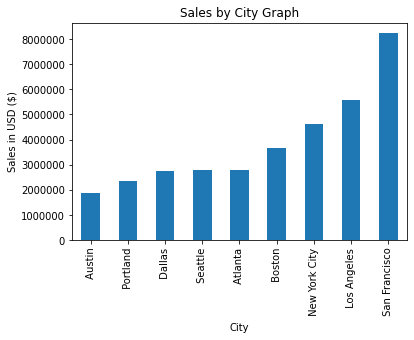

In [9]:
sales_by_city = grouped.groupby('City').sum().sort_values('Sales', ascending=True)['Sales']

print(sales_by_city)

graph_plot(sales_by_city, "Sales by City", "City", "Sales in USD ($)", 90)

## Q3: On which day and when is the best time to advertise?

### Task 3.1: Breakdown Order Date column

In [10]:
grouped['dow'] = grouped['Order Date'].dt.dayofweek
grouped['Day'] = grouped['Order Date'].dt.strftime("%a")
grouped['Hour'] = grouped['Order Date'].dt.hour

grouped.head()

,ID,User ID,Product,Quantity,Price Each,Order Date,Purchase Address,Sales,Month,Month Name,Street,City-State,City,States,Zipcode,dow,Day,Hour
0,1,34352,34in Ultrawide Monitor,1,379.99,2020-04-28 21:47:00,"4864 Willow St, Dallas, TX 75001",379.99,4,Apr,4864 Willow St,Dallas (TX),Dallas,TX,75001,1,Tue,21
1,2,34353,AA Batteries (4-pack),1,3.84,2020-04-29 06:33:00,"5103 Jefferson St, Los Angeles, CA 90001",3.84,4,Apr,5103 Jefferson St,Los Angeles (CA),Los Angeles,CA,90001,2,Wed,6
2,3,34354,Lightning Charging Cable,1,14.95,2020-04-28 16:38:00,"6451 7th St, Portland, OR 97035",14.95,4,Apr,6451 7th St,Portland (OR),Portland,OR,97035,1,Tue,16
3,4,34355,iPhone,1,700.00,2020-04-29 18:08:00,"3785 Main St, Dallas, TX 75001",700.00,4,Apr,3785 Main St,Dallas (TX),Dallas,TX,75001,2,Wed,18
4,5,34355,Wired Headphones,1,11.99,2020-04-29 18:08:00,"3785 Main St, Dallas, TX 75001",11.99,4,Apr,3785 Main St,Dallas (TX),Dallas,TX,75001,2,Wed,18


### Task 3.2: Calculate and Plot sales by day and hour

Day
Mon    4.906913e+06
Tue    4.937413e+06
Wed    5.053680e+06
Thu    5.094954e+06
Fri    4.996952e+06
Sat    4.773318e+06
Sun    4.894236e+06
Name: Sales, dtype: float64


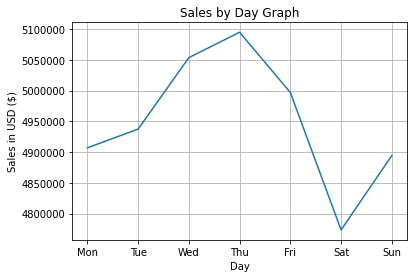

In [11]:
sales_by_day = grouped.groupby('Day').sum().sort_values('dow')['Sales']

print(sales_by_day)

graph_plot(sales_by_day, "Sales by Day", "Day", "Sales in USD ($)", kind='line')

Hour
0      777496.54
1      442712.82
2      245751.87
3      163560.19
4      143834.27
5      220918.10
6      443895.79
7      769488.58
8     1163044.16
9     1667080.44
10    1994440.66
11    2211298.46
12    2343253.68
13    2267057.33
14    2044981.64
15    1892473.75
16    1972905.14
17    2170554.55
18    2234768.94
19    2347959.63
20    2305012.22
21    1948731.62
22    1656194.15
23    1230051.47
Name: Sales, dtype: float64


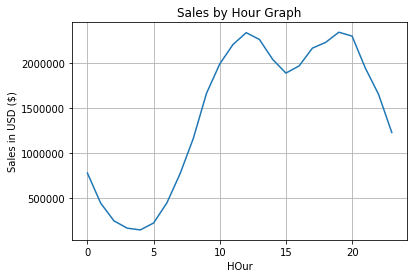

In [12]:
sales_by_hour = grouped.groupby('Hour').sum().sort_values(['Hour'])['Sales']

print(sales_by_hour)

graph_plot(sales_by_hour, "Sales by Hour", "HOur", "Sales in USD ($)", kind='line')

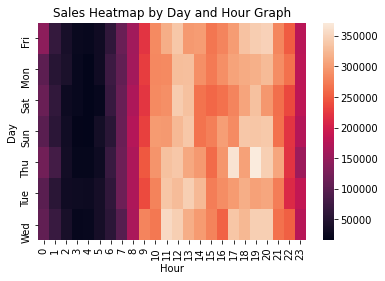

In [13]:
heatmap = grouped.groupby(['Day', 'Hour']).sum()['Sales'].unstack()

plt.figure()
plt.title("Sales Heatmap by Day and Hour" + " Graph")
sns.heatmap(heatmap)
plt.show()
plt.gcf()
plt.cla()
plt.clf()
plt.close()

#### The recommendation for advertisement is to target sells on Thursday 20 pm

## Q4: Which products are most often sold together?

### Task 4.1 Add a Paired Product column

In [14]:
# Find user with multiple purchases
multi = grouped.loc[grouped['User ID'].duplicated(keep=False)]
multi['Paired'] = multi.groupby('User ID')['Product'].transform(lambda x: (",").join(x))

multi.head()

<ipython-input-14-cebf59dab49c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi['Paired'] = multi.groupby('User ID')['Product'].transform(lambda x: (",").join(x))


,ID,User ID,Product,Quantity,Price Each,Order Date,Purchase Address,Sales,Month,Month Name,Street,City-State,City,States,Zipcode,dow,Day,Hour,Paired
3,4,34355,iPhone,1,700.00,2020-04-29 18:08:00,"3785 Main St, Dallas, TX 75001",700.00,4,Apr,3785 Main St,Dallas (TX),Dallas,TX,75001,2,Wed,18,"iPhone,Wired Headphones"
4,5,34355,Wired Headphones,1,11.99,2020-04-29 18:08:00,"3785 Main St, Dallas, TX 75001",11.99,4,Apr,3785 Main St,Dallas (TX),Dallas,TX,75001,2,Wed,18,"iPhone,Wired Headphones"
8,9,34359,Lightning Charging Cable,1,14.95,2020-04-23 13:22:00,"5215 5th St, San Francisco, CA 94016",14.95,4,Apr,5215 5th St,San Francisco (CA),San Francisco,CA,94016,3,Thu,13,"Lightning Charging Cable,Apple Airpods Headphones"
9,10,34359,Apple Airpods Headphones,1,150.00,2020-04-23 13:22:00,"5215 5th St, San Francisco, CA 94016",150.00,4,Apr,5215 5th St,San Francisco (CA),San Francisco,CA,94016,3,Thu,13,"Lightning Charging Cable,Apple Airpods Headphones"
29,30,34379,20in Monitor,1,109.99,2020-04-05 14:48:00,"5924 Hill St, Los Angeles, CA 90001",109.99,4,Apr,5924 Hill St,Los Angeles (CA),Los Angeles,CA,90001,6,Sun,14,"20in Monitor,Lightning Charging Cable"


### Task 4.2 Calculate the Paired Product combination

In [15]:
# Deduplicate the previous dataframe
dedup = multi[['User ID', 'Paired']].drop_duplicates()

print(dedup.info())
dedup.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6952 entries, 3 to 15132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User ID  6952 non-null   int64 
 1   Paired   6952 non-null   object
dtypes: int64(1), object(1)
memory usage: 162.9+ KB
None


,User ID,Paired
3,34355,"iPhone,Wired Headphones"
8,34359,"Lightning Charging Cable,Apple Airpods Headphones"
29,34379,"20in Monitor,Lightning Charging Cable"
35,34384,"Lightning Charging Cable,AA Batteries (4-pack)"
53,34401,"Thinkpad Laptop,Apple Airpods Headphones"


In [16]:
count = Counter()

for row in dedup['Paired']:
    row_list = row.split(",")
    for i in range(2,5):
        count.update(Counter(combinations(row_list, i)))

cols = ['Combination', 'Frequency']
counter = pd.DataFrame(count.most_common(), columns=cols)

counter['Combination'] = [list(tupl) for tupl in counter['Combination']]
counter['Product Num'] = [len(ls) for ls in counter['Combination']]
counter['Paired'] = [','.join(ls) for ls in counter['Combination']] 

print(counter.info())
counter.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Combination  363 non-null    object
 1   Frequency    363 non-null    int64 
 2   Product Num  363 non-null    int64 
 3   Paired       363 non-null    object
dtypes: int64(2), object(2)
memory usage: 11.5+ KB
None


,Combination,Frequency,Product Num,Paired
0,"[Google Phone, USB-C Charging Cable]",1022,2,"Google Phone,USB-C Charging Cable"
1,"[iPhone, Lightning Charging Cable]",1003,2,"iPhone,Lightning Charging Cable"
2,"[iPhone, Wired Headphones]",543,2,"iPhone,Wired Headphones"
3,"[iPhone, Apple Airpods Headphones]",398,2,"iPhone,Apple Airpods Headphones"
4,"[Vareebadd Phone, USB-C Charging Cable]",396,2,"Vareebadd Phone,USB-C Charging Cable"


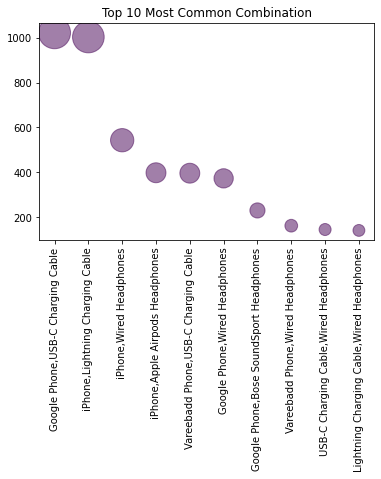

In [17]:
x = counter.Paired.head(10).values
y = counter.Frequency.head(10).values
colors = counter['Product Num'].head(10).values

plt.figure()
plt.title("Top 10 Most Common Combination")
plt.scatter(x, y, s=y, c=colors, alpha=0.5)


plt.xticks(rotation=90)


plt.show()
plt.gca()
plt.cla()
plt.gcf()
plt.clf()
plt.close()

## Q5: Which product sold the most?

### Task 5.1 Calculate and Plot sales by product and price by product

<ipython-input-18-2e5b189030f5>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation=90)


<Figure size 432x288 with 0 Axes>

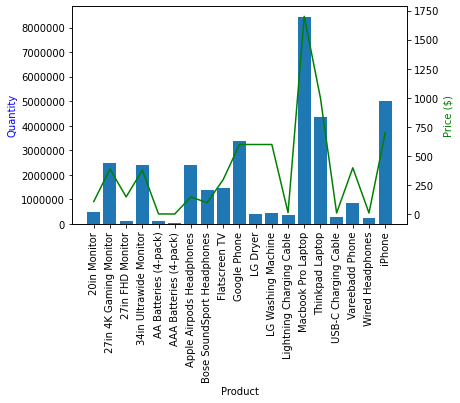

In [18]:
sales_by_product = grouped.groupby('Product').sum().sort_values('Product')['Sales']
price_by_product = grouped.groupby('Product').mean().sort_values('Product')['Price Each']

products = sales_by_product.index
quantity = sales_by_product.values
price = price_by_product.values

plt.figure()
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, quantity)
ax2.plot(products, price, 'g')

ax1.set_xlabel("Product")
ax1.set_ylabel("Quantity", color='b')
ax2.set_ylabel("Price ($)", color='g')

ax1.set_xticklabels(products, rotation=90)
ax1.ticklabel_format(style='plain', axis='y')


plt.show()
plt.gca()
plt.cla()
plt.gcf()
plt.clf()
plt.close()

## Export data to csv

In [19]:
dedup = dedup.merge(counter, how='left', on='Paired')
final = grouped.merge(dedup, how='left', on='User ID')

final.to_csv(path + '2020_Sales.csv', index=False)